# Лабораторная работа 2

In [27]:
from numpy import random
from collections import Counter
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import math

*Границы*

In [28]:
a = -7
b = 11

*Функции для расчета кол-ва интервалов М, получение у*

In [29]:
def M_make(n):
    if n <= 100:
        return int(math.sqrt(n))
    else:
        if n % int(2*math.log10(n)) == 0:
            return int(2*math.log10(n))
        elif n % int(3*math.log10(n)) == 0:
            return int(3*math.log10(n))
        else:
            return int(4 * math.log10(n))


def remake(eps):
    return eps * (b - a) + a


def make_y(x):
    return math.atan(x)

*Функция для построения полигона*

In [31]:
def build_graphics(f, x, color):
    length = len(f)
    i = 0
    while i + 1 < length:
        Y = [f[i], f[i+1]]
        X = [x[i], x[i+1]]
        plt.plot(X, Y, color=color)
        i += 1

##### Функция для построения гисторгаммы равноинтервальным методом и вывод таблицы

Шаг интервала будет одинаков для всех, v[i] - количество цифр, попавших в i-ый промежуток, f[i] отображает высоту данного промежутка. Значения для таблицы теоретической функции берется из середины интервала.

In [32]:
def equal_interval_method(y, var_range):
    length = len(y)
    M = M_make(length)
    hi = (y[-1]-y[0])/M
    A = [y[0] + (i-1)*hi for i in range(1, M + 1)]
    B = [A[i + 1] for i in range(M - 1)]
    B.append(y[-1])
    v = [0]*M
    counter = 0
    for i in range(M):
        for j in range(counter, length):
            if y[j] == B[i]:
                if i != M - 1:
                    v[i] += var_range[y[j]] * 0.5
                    v[i + 1] = var_range[y[j]] * 0.5
                else:
                    v[i] += var_range[y[j]]
                counter = j + 1
                break
            else:
                if y[j] < B[i]:
                    v[i] += var_range[y[j]]
                else:
                    counter = j
                    break
    f = [v[i]/(hi * length) for i in range(M)]
    table = PrettyTable()
    table.field_names = ["interval", "f"]
    theoretical_table = PrettyTable()
    theoretical_table.field_names = ["value", "f"]
    for i in range(len(f)):
        table.add_row([str(A[i]) + ";" + str(B[i]), f[i]])
        theoretical_table.add_row([str((A[i] + B[i]) / 2), 1 / (18 * (math.cos((A[i] + B[i]) / 2) ** 2))])
    print(table)
    print(theoretical_table)
    return f, hi

##### Функция для построения гистограммы равновероятностным способом и вывода таблицы

Количество чисел во всех интервалов будет одинаково, а вот количество интервалов различно. Значения для таблицы теоретической функции берется из середины интервала.

In [33]:
def equiprobable_method(y):
    length = len(y)
    M = M_make(length)
    vi = int(length/M)
    A = list()
    A.append(y[0])
    for i in range(1, M):
        A.append((y[i*vi + 1] + y[i * vi]) / 2)
    B = [A[i + 1] for i in range(M - 1)]
    B.append(y[length - 1])
    h = [B[i] - A[i] for i in range(M)]
    f = [vi / (h[i] * length) for i in range(M)]
    table = PrettyTable()
    table.field_names = ["interval", "f"]
    theoretical_table = PrettyTable()
    theoretical_table.field_names = ["value", "f"]
    for i in range(len(f)):
        table.add_row([str(A[i]) + ";" + str(B[i]), f[i]])
        theoretical_table.add_row([str((A[i] + B[i]) / 2), 1 / (18 * (math.cos((A[i] + B[i]) / 2) ** 2))])
    print("table")
    print(table)
    print("theoretical table")
    print(theoretical_table)
    return f, h,

*Ввод объема выборки*

In [34]:
n = int(input("enter n  "))

enter n  100


*Создание необходимого кол-ва значений*

In [35]:
eps = [random.uniform(0, 1) for i in range(n)]
x = map(remake, eps)
x = list(x)
y = list(map(make_y, x))
y = sorted(y)
var_range = dict(Counter(y))

*Построение гистограммы и полигона равноинтервальным методом, так же будут построены теоритическая функция плоности, теблица значений теоретической функции и высоты каждого интервала.*

+-------------------------------------------+---------------------+
|                  interval                 |          f          |
+-------------------------------------------+---------------------+
|    -1.42660574487264;-1.136018873099175   |   0.89474104047856  |
|   -1.136018873099175;-0.8454320013257098  | 0.20647870164889848 |
|  -0.8454320013257098;-0.5548451295522447  |  0.1720655847074154 |
|  -0.5548451295522447;-0.26425825777877976 | 0.10323935082444924 |
| -0.26425825777877976;0.026328613994685224 | 0.03441311694148308 |
|  0.026328613994685224;0.31691548576815043 | 0.06882623388296616 |
|   0.31691548576815043;0.6075023575416152  | 0.06882623388296616 |
|   0.6075023575416152;0.8980892293150804   | 0.13765246776593232 |
|   0.8980892293150804;1.1886761010885456   |  0.3097180524733477 |
|   1.1886761010885456;1.4792629728620104   |  1.4453509115422893 |
+-------------------------------------------+---------------------+
+----------------------+----------------------+


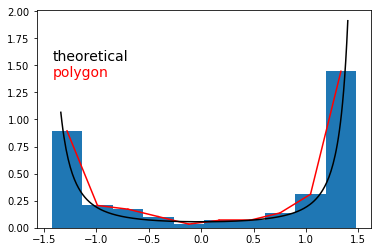

In [36]:
f, h = equal_interval_method(y, var_range)
x = [y[0]+h/2]
for i in range(len(f)-1):
    x.append(x[i] + h)
plt.bar(x, f, h)
build_graphics(f, x, "red")
i = -1.3405
x_list = []
y_list = []
while i <= 1.4:
    x_list.append(i)
    y_list.append(1/(18 * (math.cos(i))**2))
    i += 0.01
plt.plot(x_list, y_list,  color="black")
plt.text(-1.42, 1.54, "theoretical", color="black", fontsize=14)
plt.text(-1.42, 1.4, "polygon", color="red", fontsize=14)
plt.show()

*Построение гистограммы и полигона равновероятностным методом, так же будут построены теоритическая функция плоности, таблица значений теоретической функции и высоты каждого интервала.*

In [37]:
f, h = equiprobable_method(y)
x = [y[0]+(h[0]/2)]
l = len(f)
for i in range(l-1):
    x.append(x[i] + h[i]/2 + h[i+1]/2)
plt.bar(x, f, h)
build_graphics(f, x, "red")
i = math.atan(-7)
x_list = []
y_list = []
while i <= math.atan(11):
    x_list.append(i)
    y_list.append(1/(18 * (math.cos(i))**2))
    i += 0.01
plt.plot(x_list, y_list,  color="black")
plt.text(-0.5, 4.6, "theoretical", color="black", fontsize=14)
plt.text(-0.5, 4.3, "polygon", color="red", fontsize=14)
plt.show()

table
+-----------------------------------------+---------------------+
|                 interval                |          f          |
+-----------------------------------------+---------------------+
|  -1.42660574487264;-1.3750770547781004  |  1.9406664484684222 |
|  -1.3750770547781004;-1.279846507567295 |  1.0500832235966964 |
|  -1.279846507567295;-0.9084400515811408 |  0.2692468006095402 |
| -0.9084400515811408;0.04915066986638805 | 0.10442874785674236 |
|  0.04915066986638805;0.9448787172702959 | 0.11164102797699635 |
|  0.9448787172702959;1.2393726679843082  | 0.33956554882552265 |
|  1.2393726679843082;1.3835751661093285  |  0.6934692623237517 |
|  1.3835751661093285;1.4188107882372845  |  2.838037019379317  |
|  1.4188107882372845;1.4613236874706246  |  2.3522272487493976 |
|  1.4613236874706246;1.4792629728620104  |  5.5743580537504975 |
+-----------------------------------------+---------------------+
theoretical table
+---------------------+---------------------+
|     